In [841]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 사전 전처리

텍스트마이닝을 위해, 다른 데이터들의 전처리도 필요합니다.


이유는, 해당 df에는 '유실동물'도 포함되어 있기 때문입니다.

분석의 목적은 '유기동물' 데이터 분석이므로, 유실동물 데이터는 삭제해줍니다.


In [ ]:
df = pd.read_csv("C:/Users/sohee/Desktop/데이터.txt", sep = "\t", engine='python')

### 정보확인

In [843]:
# 정보확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   분리번호    6000 non-null   int64 
 1   성별      6000 non-null   object
 2   상태      6000 non-null   object
 3   중성화     6000 non-null   object
 4   특징      6000 non-null   object
 5   관리소     6000 non-null   object
 6   지역      6000 non-null   object
 7   발견일자    6000 non-null   int64 
 8   발견장소    6000 non-null   object
 9   종류      6000 non-null   object
 10  색       6000 non-null   object
 11  나이      6000 non-null   object
 12  무게      6000 non-null   object
 13  공고마감일   6000 non-null   int64 
 14  공고시작일   6000 non-null   int64 
dtypes: int64(4), object(11)
memory usage: 703.2+ KB


In [844]:
# 컬럼확인
df.columns

Index(['분리번호', '성별', '상태', '중성화', '특징', '관리소', '지역', '발견일자', '발견장소', '종류', '색',
       '나이', '무게', '공고마감일', '공고시작일'],
      dtype='object')

In [845]:
df.head(3)

,분리번호,성별,상태,중성화,특징,관리소,지역,발견일자,발견장소,종류,색,나이,무게,공고마감일,공고시작일
0,445464201800331,M,종료(반환),Y,갈색 후드티,하나동물병원,전라북도 전주시,20180308,남양 반월타운아파트,[개] 포메라니안,하얀색,2015(년생),3.2(Kg),20180319,20180308
1,445464201800332,F,종료(입양),N,대칭성탈모,서신동물병원,전라북도 전주시,20180308,전주 승화원,[개] 퍼그,갈색,2015(년생),7.0(Kg),20180319,20180308
2,445464201800333,F,종료(입양),N,빨간색 목줄,수동물병원,전라북도 전주시,20180308,완산구 안행로 110-7,[개] 진도견,흰색,2014(년생),16.4(Kg),20180319,20180308


### 전처리 - 분리번호. 지역. 발견장소 -> 필요없는 컬럼값 제거

In [846]:
# 분리번호, 지역, 발견장소

df.drop(['분리번호','지역','발견장소'],axis=1, inplace=True)

### 전처리 - 성별

In [847]:
# 성별

df['성별'].unique()

array(['M', 'F', 'Q'], dtype=object)

In [848]:
df['성별'].value_counts()

M    3151
F    2813
Q      36
Name: 성별, dtype: int64

In [849]:
# 기타의 성별을 모를 경우가 많음
df.groupby(['성별', '종류']).count()

상태  중성화  특징  관리소  발견일자   색  나이  무게  공고마감일  공고시작일
성별 종류                                                             
F  [개] 골든 리트리버    17   17  17   17    17  17  17  17     17     17
   [개] 그레이 하운드     2    2   2    2     2   2   2   2      2      2
   [개] 그레이트 피레니즈   1    1   1    1     1   1   1   1      1      1
   [개] 닥스훈트       15   15  15   15    15  15  15  15     15     15
   [개] 달마시안        1    1   1    1     1   1   1   1      1      1
...               ..  ...  ..  ...   ...  ..  ..  ..    ...    ...
Q  [기타축종] 고슴도치     2    2   2    2     2   2   2   2      2      2
   [기타축종] 뱀        2    2   2    2     2   2   2   2      2      2
   [기타축종] 식용기러기    1    1   1    1     1   1   1   1      1      1
   [기타축종] 앵무새      1    1   1    1     1   1   1   1      1      1
   [기타축종] 오리       2    2   2    2     2   2   2   2      2      2

[183 rows x 10 columns]

### 전처리 - 종류

In [850]:
# 상태 종류() 부문 

df['종류'].unique()

array(['[개] 포메라니안', '[개] 퍼그', '[개] 진도견', '[개] 믹스견', '[개] 아메리칸 코카 스파니엘',
       '[개] 골든 리트리버', '[고양이] 한국 고양이', '[개] 말티즈', '[개] 미니어쳐 푸들',
       '[고양이] 터키시 앙고라', '[개] 요크셔 테리어', '[개] 푸들', '[개] 치와와', '[개] 토이 푸들',
       '[개] 미니어쳐 핀셔', '[기타축종] 식용기러기', '[개] 페키니즈', '[고양이] 샴',
       '[고양이] 노르웨이 숲', '[개] 시츄', '[개] 스피츠', '[개] 닥스훈트', '[고양이] 스코티시폴드',
       '[개] 시베리안 허스키', '[고양이] 아메리칸 쇼트헤어', '[개] 보더 콜리', '[개] 달마시안',
       '[개] 핏불테리어', '[개] 웰시 코기 펨브로크', '[고양이] 페르시안-페르시안 친칠라', '[개] 포인터',
       '[고양이] 러시안 블루', '[개] 마리노이즈', '[기타축종] 거북이', '[개] 올드 잉글리쉬 쉽독',
       '[개] 코카 스파니엘', '[개] 프렌치 불독', '[개] 셔틀랜드 쉽독', '[기타축종] 염소',
       '[개] 슈나우져', '[기타축종] 토끼', '[개] 셰퍼드', '[개] 알라스칸 말라뮤트',
       '[개] 라브라도 리트리버', '[개] 비숑 프리제', '[고양이] 아비시니안', '[고양이] 페르시안잡종',
       '[개] 보스턴 테리어', '[개] 시바', '[기타축종] ', '[개] 차우차우', '[개] 도사',
       '[고양이] 벵갈', '[개] 세인트 버나드', '[개] 코카 푸', '[기타축종] 돼지', '[고양이] 고양이',
       '[개] 아이리쉬 세터', '[개] 사모예드', '[기타축종] 기이나피그', '[기타축종] 기니아피그',
       '[개] 삽살개', '[고양이] 레그돌-라가머핀', '[고양이] 믹스', '[개] 풍산

In [851]:
df['종류'].value_counts()

[개] 믹스견          1957
[고양이] 한국 고양이     1898
[개] 말티즈           361
[개] 푸들            283
[개] 진도견           202
                 ... 
[개] 미니어쳐 슈나우저       1
[개] 휘펫              1
[개] 코카시안오브차카        1
[개] 아메리칸불리          1
[개] 세인트 버나드         1
Name: 종류, Length: 112, dtype: int64

In [852]:
df["종류"] = df["종류"].apply(lambda x: '믹스견' if x=="[개] 믹스견" else ('품종견' if ("개" in x) else ('한국묘' if (x=="[고양이] 한국 고양이") else ("품종묘" if ("고양이" in x) else "기타" ))))
df['종류'].value_counts()

믹스견    1957
한국묘    1898
품종견    1812
품종묘     276
기타       57
Name: 종류, dtype: int64

### 전처리 - 나이

출생년도를 기준으로, 발견년도 기준 나이를 책정

단위: 1년단위

In [853]:
df['나이']=df['나이'].str.replace("년생",'').str.replace("(",'').str.replace(")",'').astype(int)
df['나이']=df['발견일자'].astype(str).str[:4].astype(int)-df['나이']+1

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='나이', ylabel='Density'>

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 45208 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 45208 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0, flags=flags)


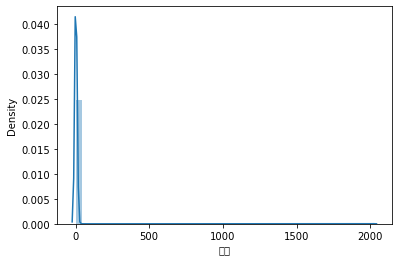

In [854]:
sns.distplot(df['나이'])

### 전처리 - 중성화

In [855]:
# 이상치 삭제

outlier_index = df[df['나이']>=50]['나이'].index

In [856]:
df.drop(outlier_index, inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='나이', ylabel='Density'>

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 45208 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 45208 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0, flags=flags)


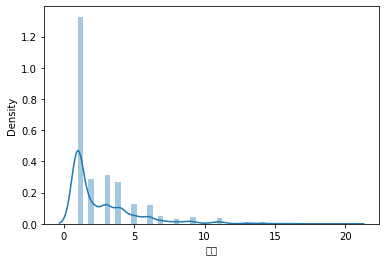

In [857]:
# 차트 재확인
sns.distplot(df['나이'])

In [858]:
# 값 종류 확인
df['중성화'].value_counts()

N    5350
Y     444
U     203
Name: 중성화, dtype: int64

In [859]:
# 중성화 유무와 종류가 차이가 존재하는지 확인

df.groupby(['중성화','종류']).count()

성별    상태    특징   관리소  발견일자     색    나이    무게  공고마감일  공고시작일
중성화 종류                                                               
N   기타     45    45    45    45    45    45    45    45     45     45
    믹스견  1886  1886  1886  1886  1886  1886  1886  1886   1886   1886
    품종견  1424  1424  1424  1424  1424  1424  1424  1424   1424   1424
    품종묘   206   206   206   206   206   206   206   206    206    206
    한국묘  1789  1789  1789  1789  1789  1789  1789  1789   1789   1789
U   기타     12    12    12    12    12    12    12    12     12     12
    믹스견    42    42    42    42    42    42    42    42     42     42
    품종견    77    77    77    77    77    77    77    77     77     77
    품종묘    12    12    12    12    12    12    12    12     12     12
    한국묘    60    60    60    60    60    60    60    60     60     60
Y   믹스견    28    28    28    28    28    28    28    28     28     28
    품종견   309   309   309   309   309   309   309   309    309    309
    품종묘    58    58    58    58    58    58    58    58     58     58
    한국묘    49    49    49    49    49    49    49    49     49     49

### 전처리 - 상태

반환중. 보호중은 각각 유실동물이 아니거나 입양결정이 나지 않았으므로 데이터를 삭제해준다.

In [870]:
# 분포 확인
df['상태'].value_counts()

종료(입양)     2674
종료(자연사)    1456
종료(반환)      912
종료(안락사)     739
보호중         127
종료(방사)       80
Name: 상태, dtype: int64

In [871]:
# 1. 반환. 보호중 삭제

drop_index = df[(df['상태']=='보호중') | (df['상태']=='종료(반환)')].index
df.drop(drop_index, inplace=True)

In [872]:
# 2. 입양과 비입양으로 분리

df['상태'] = df['상태'].apply(lambda x : '입양' if (x == '종료(입양)') else ('비입양') )

In [873]:
# 3. 분포 확인

df['상태'].value_counts()

입양     2674
비입양    2275
Name: 상태, dtype: int64

### 전처리 - 특징, 색


In [874]:
text_samp = df[['특징', '색', '상태']]
df.drop(['특징','색'], axis=1, inplace=True)

### 전처리 - X, y 데이터셋 분리

In [875]:
y = df['상태']
X = df.drop(['상태'], axis=1)

### 전처리 - 각 데이터셋 인코딩 수행

In [876]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

X_enc = pd.get_dummies(df)
y_enc = le.fit_transform(y)

# 여기서부터 텍스트 분석 !!

위는 아래 작업을 위한 전처리를 수행한 결과입니다!


In [878]:
text_samp['상태'] = le.transform(text_samp['상태'])

<ipython-input-878-bd025fa696dd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_samp['상태'] = le.transform(text_samp['상태'])


In [879]:
text_samp.to_csv("text.csv")

In [880]:
text_samp.reset_index(drop=True, inplace=True)

In [881]:
# 토큰화를 시도합니다.

import konlpy
from konlpy.tag import Twitter

In [1008]:
# re 라이브러리를 활용해 제거합니다. 
import re

# 정규표현식(특정한 규칙을 가진 문자열의 집합을 표현하는 데에 사용)을 사용하여 앞 숫자를 없앤다.
text_samp['특징'] = text_samp['특징'].apply( lambda x : re.sub('[-=+,#/\?:^$.@*\"※~&%ㆍ!』\\‘|\(\)\[\]\<\>`\'…》]', " ", str(x)) ) #\d+ 1개이상 숫자가 있는 것은 " "으로 바꾼다. 치환
text_samp = text_samp.fillna(' ')

# 실제 토큰화
text_samp['특징 tokens'] = text_samp['특징'].apply(lambda x: twitter.morphs(x))
text_samp['특징 tokens'].head(50)

0                                  [대칭성, 탈모]
1                                  [빨간색, 목줄]
2                                  [파란색, 목줄]
3                                         []
4                               [녹색, 목줄, 착용]
5                                      [온순함]
6                                    [포유, 중]
7                                    [포유, 중]
8                                    [포유, 중]
9                                    [포유, 중]
10                                   [포유, 중]
11                                   [포유, 중]
12                                [교통사고, 골절]
13                                [겁, 이, 많음]
14                                [겁, 이, 많음]
15                 [양, 귀가, 아래, 로, 쳐진, 얼룩, 이]
16                               [다리, 가, 짧음]
17                                      [연변]
18                                      [연변]
19                             [빨강, 색목줄, 착용]
20                             [피부병, 전체, 미용]
21                    [교통사고, 추정, 구강, 비강, 출혈]
22        

In [883]:
# 한글 불용어 정의

stop_words = '아 됨 있음 편 요 함 짐 EM 동 있음 있었음 추정 20일 는 짇 25일 고 너무 쪽 함 1 2 3 4 5 6 7 8 9 이 다 의한 증 중 휴 아이구 아이쿠 아이고 어 나 우리 저희 따라 의해 을 를 에 의 가 으로 로 에게 뿐이다 의거하여 근거하여 입각하여 기준으로 예하면 예를 들면 예를 들자면 저 소인 소생 저희 지말고 하지마 하지마라 다른 물론 또한 그리고 비길수 없다 해서는 안된다 뿐만 아니라 만이 아니다 만은 아니다 막론하고 관계없이 그치지 않다 그러나 그런데 하지만 든간에 논하지 않다 따지지 않다 설사 비록 더라도 아니면 만 못하다 하는 편이 낫다 불문하고 향하여 향해서 향하다 쪽으로 틈타 이용하여 타다 오르다 제외하고 이 외에 이 밖에 하여야 비로소 한다면 몰라도 외에도 이곳 여기 부터 기점으로 따라서 할 생각이다 하려고하다 이리하여 그리하여 그렇게 함으로써 하지만 일때 할때 앞에서 중에서 보는데서 으로써 로써 까지 해야한다 일것이다 반드시 할줄알다 할수있다 할수있어 임에 틀림없다 한다면 등 등등 제 겨우 단지 다만 할뿐 딩동 댕그 대해서 대하여 대하면 훨씬 얼마나 얼마만큼 얼마큼 남짓 여 얼마간 약간 다소 좀 조금 다수 몇 얼마 지만 하물며 또한 그러나 그렇지만 하지만 이외에도 대해 말하자면 뿐이다 다음에 반대로 반대로 말하자면 이와 반대로 바꾸어서 말하면 바꾸어서 한다면 만약 그렇지않으면 까악 툭 딱 삐걱거리다 보드득 비걱거리다 꽈당 응당 해야한다 에 가서 각 각각 여러분 각종 각자 제각기 하도록하다 와 과 그러므로 그래서 고로 한 까닭에 하기 때문에 거니와 이지만 대하여 관하여 관한 과연 실로 아니나다를가 생각한대로 진짜로 한적이있다 하곤하였다 하 하하 허허 아하 거바 와 오 왜 어째서 무엇때문에 어찌 하겠는가 무슨 어디 어느곳 더군다나 하물며 더욱이는 어느때 언제 야 이봐 어이 여보시오 흐흐 흥 휴 헉헉 헐떡헐떡 영차 여차 어기여차 끙끙 아야 앗 아야 콸콸 졸졸 좍좍 뚝뚝 주룩주룩 솨 우르르 그래도 또 그리고 바꾸어말하면 바꾸어말하자면 혹은 혹시 답다 및 그에 따르는 때가 되어 즉 지든지 설령 가령 하더라도 할지라도 일지라도 지든지 몇 거의 하마터면 인젠 이젠 된바에야 된이상 만큼 어찌됏든 그위에 게다가 점에서 보아 비추어 보아 고려하면 하게될것이다 일것이다 비교적 좀 보다더 비하면 시키다 하게하다 할만하다 의해서 연이서 이어서 잇따라 뒤따라 뒤이어 결국 의지하여 기대여 통하여 자마자 더욱더 불구하고 얼마든지 마음대로 주저하지 않고 곧 즉시 바로 당장 하자마자 밖에 안된다 하면된다 그래 그렇지 요컨대 다시 말하자면 바꿔 말하면 즉 구체적으로 말하자면 시작하여 시초에 이상 허 헉 허걱 바와같이 해도좋다 해도된다 게다가 더구나 하물며 와르르 팍 퍽 펄렁 동안 이래 하고있었다 이었다 에서 로부터 까지 예하면 했어요 해요 함께 같이 더불어 마저 마저도 양자 모두 습니다 가까스로 하려고하다 즈음하여 다른 다른 방면으로 해봐요 습니까 했어요 말할것도 없고 무릎쓰고 개의치않고 하는것만 못하다 하는것이 낫다 매 매번 들 모 어느것 어느 로써 갖고말하자면 어디 어느쪽 어느것 어느해 어느 년도 라 해도 언젠가 어떤것 어느것 저기 저쪽 저것 그때 그럼 그러면 요만한걸 그래 그때 저것만큼 그저 이르기까지 할 줄 안다 할 힘이 있다 너 너희 당신 어찌 설마 차라리 할지언정 할지라도 할망정 할지언정 구토하다 게우다 토하다 메쓰겁다 옆사람 퉤 쳇 의거하여 근거하여 의해 따라 힘입어 그 다음 버금 두번째로 기타 첫번째로 나머지는 그중에서 견지에서 형식으로 쓰여 입장에서 위해서 단지 의해되다 하도록시키다 뿐만아니라 반대로 전후 전자 앞의것 잠시 잠깐 하면서 그렇지만 다음에 그러한즉 그런즉 남들 아무거나 어찌하든지 같다 비슷하다 예컨대 이럴정도로 어떻게 만약 만일 위에서 서술한바와같이 인 듯하다 하지 않는다면 만약에 무엇 무슨 어느 어떤 아래윗 조차 한데 그럼에도 불구하고 여전히 심지어 까지도 조차도 하지 않도록 않기 위하여 때 시각 무렵 시간 동안 어때 어떠한 하여금 네 예 우선 누구 누가 알겠는가 아무도 줄은모른다 줄은 몰랏다 하는 김에 겸사겸사 하는바 그런 까닭에 한 이유는 그러니 그러니까 때문에 그 너희 그들 너희들 타인 것 것들 너 위하여 공동으로 동시에 하기 위하여 어찌하여 무엇때문에 붕붕 윙윙 나 우리 엉엉 휘익 윙윙 오호 아하 어쨋든 만 못하다 하기보다는 차라리 하는 편이 낫다 흐흐 놀라다 상대적으로 말하자면 마치 아니라면 쉿 그렇지 않으면 그렇지 않다면 안 그러면 아니었다면 하든지 아니면 이라면 좋아 알았어 하는것도 그만이다 어쩔수 없다 하나 일 일반적으로 일단 한켠으로는 오자마자 이렇게되면 이와같다면 전부 한마디 한항목 근거로 하기에 아울러 하지 않도록 않기 위해서 이르기까지 이 되다 로 인하여 까닭으로 이유만으로 이로 인하여 그래서 이 때문에 그러므로 그런 까닭에 알 수 있다 결론을 낼 수 있다 으로 인하여 있다 어떤것 관계가 있다 관련이 있다 연관되다 어떤것들 에 대해 이리하여 그리하여 여부 하기보다는 하느니 하면 할수록 운운 이러이러하다 하구나 하도다 다시말하면 다음으로 에 있다 에 달려 있다 우리 우리들 오히려 하기는한데 어떻게 어떻해 어찌됏어 어때 어째서 본대로 자 이 이쪽 여기 이것 이번 이렇게말하자면 이런 이러한 이와 같은 요만큼 요만한 것 얼마 안 되는 것 이만큼 이 정도의 이렇게 많은 것 이와 같다 이때 이렇구나 것과 같이 끼익 삐걱 따위 와 같은 사람들 부류의 사람들 왜냐하면 중의하나 오직 오로지 에 한하다 하기만 하면 도착하다 까지 미치다 도달하다 정도에 이르다 할 지경이다 결과에 이르다 관해서는 여러분 하고 있다 한 후 혼자 자기 자기집 자신 우에 종합한것과같이 총적으로 보면 총적으로 말하면 총적으로 대로 하다 으로서 참 그만이다 할 따름이다 쿵 탕탕 쾅쾅 둥둥 봐 봐라 아이야 아니 와아 응 아이 참나 년 월 일 령 영 일 이 삼 사 오 육 륙 칠 팔 구 이천육 이천칠 이천팔 이천구 하나 둘 셋 넷 다섯 여섯 일곱 여덟 아홉 령 영 이 있 하 것 들 그 되 수 이 보 않 없 나 사람 주 아니 등 같 우리 때 년 가 한 지 대하 오 말 일 그렇 위하 때문 그것 두 말하 알 그러나 받 못하 일 그런 또 문제 더 사회 많 그리고 좋 크 따르 중 나오 가지 씨 시키 만들 지금 생각하 그러 속 하나 집 살 모르 적 월 데 자신 안 어떤 내 내 경우 명 생각 시간 그녀 다시 이런 앞 보이 번 나 다른 어떻 여자 개 전 들 사실 이렇 점 싶 말 정도 좀 원 잘 통하 놓'
stop_words=stop_words.split(' ')

In [884]:
# 불용어 제거
num=0
_list_=[]
tokens=[]
for w in text_samp['특징 tokens']:
    for i in range(len(w)):
        if w[i] not in stop_words:
            tokens.append(w[i])
    #text_samp['특징 tokens 불용 제거'][num].append([tokens])
    _list_.append(tokens)
    tokens=[]
    num+=1

In [1012]:
text_samp[50:100]

,특징,색,상태,특징 tokens,0,색 tokens
50,귀끝 베이지색,백,1,"[귀, 끝, 베이지색]","[귀, 끝, 베이지색]",[백]
51,온순함,황,0,[온순함],[온순함],[황]
52,온순함 얼굴쪽 짙은색,황,1,"[온순함, 얼굴, 쪽, 짙, 은색]","[온순함, 얼굴, 짙, 은색]",[황]
53,교통사고추정 후지파행,노랑,0,"[교통사고, 추정, 후지, 파행]","[교통사고, 후지, 파행]",[노랑]
54,털이 심하게엉키고 야윈편,흰,0,"[털, 이, 심하게, 엉, 키, 고, 야윈, 편]","[털, 심하게, 엉, 키, 야윈]",[흰]
55,살색옷 착용,검,1,"[살색, 옷, 착용]","[살색, 옷, 착용]",[검]
56,옷입고있고 미용되어있으며 양쪽슬개골탈구 심함,갈,0,"[옷, 입고있고, 미용, 되어있으며, 양쪽, 슬개골탈구, 심함]","[옷, 입고있고, 미용, 되어있으며, 양쪽, 슬개골탈구, 심함]",[갈]
57,삭모되어있고 옷입고있으며 온순,갈,0,"[삭, 모되, 어, 있고, 옷, 입고있으며, 온순]","[삭, 모되, 있고, 옷, 입고있으며, 온순]",[갈]
58,온순하고 털이 엉켜있음,흰,1,"[온순하고, 털, 이, 엉, 켜있음]","[온순하고, 털, 엉, 켜있음]",[흰]
59,하늘색 목줄 착용,흰,0,"[하늘색, 목줄, 착용]","[하늘색, 목줄, 착용]",[흰]


In [885]:
text_samp = pd.concat([text_samp, pd.DataFrame([_list_]).T], axis=1)

In [887]:
# '색' feature 기호 제거 
# 추가로, '색'을 제거(갈과 갈색이 분리되는 것을 방지)
text_samp['색'] = text_samp['색'].apply( lambda x : re.sub('[-=+,#/\?:^$.@*\"※~&%ㆍ!』\\‘|\(\)\[\]\<\>`\'…》절 색 가랙 리  무니 얀 정 은 에 뒤 약간 ]','', str(x)) )

# 실제 토큰화
text_samp['색 tokens'] = text_samp['색'].apply(lambda x: twitter.morphs(x))
text_samp['색 tokens'].head(20)

0         [갈]
1         [흰]
2         [갈]
3         [갈]
4        [버프]
5        [골든]
6         [흰]
7      [갈, 검]
8         [흰]
9         [흰]
10        [흰]
11        [흰]
12     [흰, 갈]
13      [베이지]
14        [검]
15    [흰, 노랑]
16       [노랑]
17     [갈, 검]
18     [흰, 갈]
19     [흰, 갈]
Name: 색 tokens, dtype: object

In [888]:
from collections import Counter

word_counts = Counter()
text_samp['색 tokens'].apply(lambda x: word_counts.update(x))

word_counts

Counter({'갈': 1534,
         '흰': 2633,
         '버프': 2,
         '골든': 11,
         '검': 1249,
         '베이지': 16,
         '노랑': 133,
         '회': 114,
         '하': 34,
         '삼': 259,
         '블탄': 27,
         '블': 19,
         '백': 104,
         '황': 68,
         '브라운': 29,
         '회검': 18,
         '흑': 49,
         '옅': 6,
         '초코': 10,
         '호피': 6,
         '살구': 16,
         '연': 26,
         '크림': 59,
         '적': 2,
         '청': 14,
         '블앤': 5,
         '화이트': 9,
         '검회': 183,
         '연한': 6,
         '금': 4,
         '거': 1,
         '치즈': 172,
         '적갈줄늬': 1,
         '고등어': 51,
         '섞임': 1,
         '턱': 8,
         '시도': 8,
         '쵸코': 11,
         '렛': 2,
         '갈검줄늬': 3,
         '하양': 6,
         '탄': 2,
         '블루': 9,
         '노란': 53,
         '흑갈줄늬': 3,
         '실버': 4,
         '삼이': 29,
         '검줄': 2,
         '늬': 5,
         '주황': 2,
         '미': 6,
         '고동': 8,
         '얼룩': 3,
         '반점': 2,


In [889]:
!pip install gensim

distutils: c:\programdata\anaconda3\Include\UNKNOWN
sysconfig: c:\programdata\anaconda3\Include
user = False
home = None
root = None
prefix = None
distutils: c:\programdata\anaconda3\Include\UNKNOWN
sysconfig: c:\programdata\anaconda3\Include
user = False
home = None
root = None
prefix = None


In [890]:
import matplotlib.pyplot as plt
from gensim.models.word2vec import Word2Vec

In [896]:
# 특징(불용어처리된 토큰) 리스트화 (벡터화위한 사전작업)
tokenized_data = []
for sentence in text_samp[0]:
    tokenized_data.append(sentence)

In [897]:
# 특징(불용어처리된 토큰) 벡터화
from gensim.models import Word2Vec
model = Word2Vec(text_samp[0], window=1, min_count=1, workers=10)

In [898]:
# 완성된 임베딩 매트릭스(특징(불용어처리된 토큰))의 크기 확인
model.wv.vectors.shape

(1502, 100)

### 연관성있는 단어 찾아보기

In [1007]:
print(model.wv.most_similar("미용"))

[('꼬리', 0.8454040288925171), ('털', 0.8388867974281311), ('옷', 0.8324140906333923), ('착용', 0.8250033855438232), ('목줄', 0.8182965517044067), ('눈', 0.8161748051643372), ('믹스', 0.8062542080879211), ('있고', 0.7995103597640991), ('후지', 0.7912415266036987), ('주위', 0.7880499362945557)]


In [911]:
# 색(불용어처리된 토큰) 리스트화

tokenized_data = []
for sentence in text_samp['색 tokens']:
    tokenized_data.append(sentence)
    
model_color = Word2Vec(tokenized_data, window=1, min_count=1, workers=10)

In [912]:
# 완성된 임베딩 매트릭스(특징(불용어처리된 토큰))의 크기 확인
model_color.wv.vectors.shape

(197, 100)

In [916]:
print(model_color.wv.most_similar("검"))

[('적', 0.3949168622493744), ('블', 0.38771650195121765), ('시도', 0.3404039144515991), ('흰', 0.3331473767757416), ('턱', 0.31224843859672546), ('2', 0.3050896227359772), ('초코', 0.27890241146087646), ('치즈', 0.26976507902145386), ('늬', 0.2626682221889496), ('노란', 0.25868988037109375)]


## 텍스트마이닝 모델링

In [924]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import losses
from tensorflow.keras import metrics

In [1042]:
from collections import Counter

word_counts = Counter()
text_samp[0].apply(lambda x: word_counts.update(x))

selected_words = word_counts.most_common(100)

In [1043]:
# 전체 토큰 수 대비 토큰의 차지 비율 확인

def word_count(docs):
  
    # 전체 코퍼스에서 단어 빈도 카운트
    word_counts = Counter()

    # 단어가 존재하는 문서의 빈도 카운트, 단어가 한 번 이상 존재하면 +1
    word_in_docs = Counter()

    # 전체 문서의 갯수
    total_docs = len(docs)

    for doc in docs:
        word_counts.update(doc)
        word_in_docs.update(set(doc))

    temp = zip(word_counts.keys(), word_counts.values())
    wc = pd.DataFrame(temp, columns = ['word', 'count'])

    # 단어의 순위
    # method='first': 같은 값의 경우 먼저나온 요소를 우선
    wc['rank'] = wc['count'].rank(method='first', ascending=False)
    total = wc['count'].sum()

    # 코퍼스 내 단어의 비율
    wc['percent'] = wc['count'].apply(lambda x: x / total)
    wc = wc.sort_values(by='rank')

    # 누적 비율
    # cumsum() : cumulative sum
    wc['cul_percent'] = wc['percent'].cumsum()

    temp2 = zip(word_in_docs.keys(), word_in_docs.values())
    ac = pd.DataFrame(temp2, columns=['word', 'word_in_docs'])
    wc = ac.merge(wc, on='word')
    
    # 전체 문서 중 존재하는 비율
    wc['word_in_docs_percent'] = wc['word_in_docs'].apply(lambda x: x / total_docs)

    return wc.sort_values(by='rank')

In [1044]:
wc_manual = word_count(text_samp[0])
wc_manual

,word,word_in_docs,count,rank,percent,cul_percent,word_in_docs_percent
5,착용,358,358,1.0,0.029087,0.029087,0.072338
228,박스,350,350,2.0,0.028437,0.057524,0.070721
2,목줄,340,340,3.0,0.027624,0.085148,0.068701
9,교통사고,309,309,4.0,0.025106,0.110253,0.062437
7,온순함,299,299,5.0,0.024293,0.134547,0.060416
...,...,...,...,...,...,...,...
1496,했던,1,1,1498.0,0.000081,0.999675,0.000202
1498,파고들,1,1,1499.0,0.000081,0.999756,0.000202
1499,어감,1,1,1500.0,0.000081,0.999838,0.000202
1500,피,1,1,1501.0,0.000081,0.999919,0.000202


In [1067]:
# Recommend, Unrecommend 여부에 따라 달라지는 텍스트 비중 확인위해, df['Recommended IND'] 나눠 token값 집계한 결과값을 추가
recomend = Counter()
unrecomend = Counter()

for index, val in enumerate(text_samp['상태']) :
    if val == 1 :
        recomend.update(text_samp[0][index]) 
    else :
        unrecomend.update(text_samp[0][index])

unrecommend_df = pd.DataFrame(zip(unrecomend.keys(), unrecomend.values()), columns =['word','Adoption failure'])
recommend_df = pd.DataFrame(zip(recomend.keys(), recomend.values()), columns =['word','Adoption'])

In [1068]:
recommend_df

,word,Adoption
0,대칭성,1
1,탈모,15
2,빨간색,19
3,목줄,168
4,녹색,17
...,...,...
1060,했던,1
1061,50일,2
1062,파고들,1
1063,어감,1


In [1069]:
unrecommend_df

,word,Adoption failure
0,파란색,54
1,목줄,172
2,포유,18
3,교통사고,281
4,골절,79
...,...,...
984,철물,1
985,점목줄,1
986,쓰러져,1
987,시바,1


In [ ]:
unrecommend_df

In [1070]:
wc_manual = recommend_df.merge(unrecommend_df, on='word')

In [1074]:
wc_manual.sort_values(by='Adoption failure', ascending=False).head(10)

,word,Adoption,Adoption failure
68,교통사고,28,281
2,목줄,168,172
110,박스,184,166
4,착용,210,148
136,종이,127,116
5,온순함,219,80
27,털,113,79
70,골절,14,79
93,어미,113,77
127,결막염,32,75


In [1026]:
 word_counts.most_common(100)

[('착용', 358),
 ('박스', 350),
 ('목줄', 340),
 ('교통사고', 309),
 ('온순함', 299),
 ('종이', 243),
 ('털', 192),
 ('어미', 190),
 ('구조', 154),
 ('버려짐', 138),
 ('잃은', 131),
 ('없음', 130),
 ('미용', 127),
 ('결막염', 107),
 ('양', 105),
 ('순함', 99),
 ('귀', 97),
 ('눈꼽', 97),
 ('발견', 95),
 ('골절', 93),
 ('온순', 91),
 ('피부', 89),
 ('파란색', 88),
 ('눈', 84),
 ('질병', 80),
 ('후지', 79),
 ('심함', 79),
 ('빨강', 75),
 ('긴급', 68),
 ('마비', 65),
 ('매우', 62),
 ('포획', 58),
 ('꼬리', 57),
 ('새끼', 57),
 ('마리', 56),
 ('개월', 55),
 ('따름', 54),
 ('옷', 53),
 ('많음', 52),
 ('가슴', 52),
 ('피부병', 51),
 ('상자', 51),
 ('엉', 50),
 ('예민함', 50),
 ('들개', 49),
 ('감염', 47),
 ('겁', 46),
 ('포유', 44),
 ('검정색', 44),
 ('쓰러져있음', 43),
 ('목걸이', 42),
 ('기립', 41),
 ('상태', 41),
 ('어림', 41),
 ('불능', 40),
 ('담겨', 40),
 ('움', 39),
 ('자견', 39),
 ('마취', 39),
 ('콧물', 39),
 ('탈모', 38),
 ('빨간색', 38),
 ('파행', 38),
 ('노란색', 38),
 ('눈물', 38),
 ('전신', 38),
 ('색', 38),
 ('갈색', 38),
 ('빨간', 37),
 ('견', 37),
 ('켜있음', 36),
 ('코', 36),
 ('새끼고양이', 36),
 ('약', 35),
 ('야윔', 35),
 ('

In [1026]:
 word_counts.most_common(100)

[('착용', 358),
 ('박스', 350),
 ('목줄', 340),
 ('교통사고', 309),
 ('온순함', 299),
 ('종이', 243),
 ('털', 192),
 ('어미', 190),
 ('구조', 154),
 ('버려짐', 138),
 ('잃은', 131),
 ('없음', 130),
 ('미용', 127),
 ('결막염', 107),
 ('양', 105),
 ('순함', 99),
 ('귀', 97),
 ('눈꼽', 97),
 ('발견', 95),
 ('골절', 93),
 ('온순', 91),
 ('피부', 89),
 ('파란색', 88),
 ('눈', 84),
 ('질병', 80),
 ('후지', 79),
 ('심함', 79),
 ('빨강', 75),
 ('긴급', 68),
 ('마비', 65),
 ('매우', 62),
 ('포획', 58),
 ('꼬리', 57),
 ('새끼', 57),
 ('마리', 56),
 ('개월', 55),
 ('따름', 54),
 ('옷', 53),
 ('많음', 52),
 ('가슴', 52),
 ('피부병', 51),
 ('상자', 51),
 ('엉', 50),
 ('예민함', 50),
 ('들개', 49),
 ('감염', 47),
 ('겁', 46),
 ('포유', 44),
 ('검정색', 44),
 ('쓰러져있음', 43),
 ('목걸이', 42),
 ('기립', 41),
 ('상태', 41),
 ('어림', 41),
 ('불능', 40),
 ('담겨', 40),
 ('움', 39),
 ('자견', 39),
 ('마취', 39),
 ('콧물', 39),
 ('탈모', 38),
 ('빨간색', 38),
 ('파행', 38),
 ('노란색', 38),
 ('눈물', 38),
 ('전신', 38),
 ('색', 38),
 ('갈색', 38),
 ('빨간', 37),
 ('견', 37),
 ('켜있음', 36),
 ('코', 36),
 ('새끼고양이', 36),
 ('약', 35),
 ('야윔', 35),
 ('

In [1026]:
 word_counts.most_common(100)

[('착용', 358),
 ('박스', 350),
 ('목줄', 340),
 ('교통사고', 309),
 ('온순함', 299),
 ('종이', 243),
 ('털', 192),
 ('어미', 190),
 ('구조', 154),
 ('버려짐', 138),
 ('잃은', 131),
 ('없음', 130),
 ('미용', 127),
 ('결막염', 107),
 ('양', 105),
 ('순함', 99),
 ('귀', 97),
 ('눈꼽', 97),
 ('발견', 95),
 ('골절', 93),
 ('온순', 91),
 ('피부', 89),
 ('파란색', 88),
 ('눈', 84),
 ('질병', 80),
 ('후지', 79),
 ('심함', 79),
 ('빨강', 75),
 ('긴급', 68),
 ('마비', 65),
 ('매우', 62),
 ('포획', 58),
 ('꼬리', 57),
 ('새끼', 57),
 ('마리', 56),
 ('개월', 55),
 ('따름', 54),
 ('옷', 53),
 ('많음', 52),
 ('가슴', 52),
 ('피부병', 51),
 ('상자', 51),
 ('엉', 50),
 ('예민함', 50),
 ('들개', 49),
 ('감염', 47),
 ('겁', 46),
 ('포유', 44),
 ('검정색', 44),
 ('쓰러져있음', 43),
 ('목걸이', 42),
 ('기립', 41),
 ('상태', 41),
 ('어림', 41),
 ('불능', 40),
 ('담겨', 40),
 ('움', 39),
 ('자견', 39),
 ('마취', 39),
 ('콧물', 39),
 ('탈모', 38),
 ('빨간색', 38),
 ('파행', 38),
 ('노란색', 38),
 ('눈물', 38),
 ('전신', 38),
 ('색', 38),
 ('갈색', 38),
 ('빨간', 37),
 ('견', 37),
 ('켜있음', 36),
 ('코', 36),
 ('새끼고양이', 36),
 ('약', 35),
 ('야윔', 35),
 ('

In [1014]:
!pip install keras

distutils: c:\programdata\anaconda3\Include\UNKNOWN
sysconfig: c:\programdata\anaconda3\Include
user = False
home = None
root = None
prefix = None
distutils: c:\programdata\anaconda3\Include\UNKNOWN
sysconfig: c:\programdata\anaconda3\Include
user = False
home = None
root = None
prefix = None


In [1021]:
### 모델링 에러 해결 필요

import numpy as np
y_train = text_samp['상태']

x_train=[]
for i in range(len(text_samp)):
    x_train.append(text_samp[0][i])

from keras.preprocessing.sequence import pad_sequences
max_len = 0
x_train=np.asarray(x_train).astype(np.object)
y_train=np.asarray(y_train).astype(np.int)

X_train = pad_sequences(x_train, maxlen=max_len)

ValueError: invalid literal for int() with base 10: '대칭성'

In [1024]:
model = Sequential()
model.add(Embedding(10, 100))
model.add(LSTM(128))
model.add(Dense(1, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=10, batch_size=10, validation_split=0.1)


Epoch 1/10


InvalidArgumentError:  indices[0,0] = 20180804 is not in [0, 10)
	 [[node sequential_14/embedding_1/embedding_lookup (defined at <ipython-input-1024-97bbe7a962b1>:7) ]] [Op:__inference_train_function_5344]

Errors may have originated from an input operation.
Input Source operations connected to node sequential_14/embedding_1/embedding_lookup:
 sequential_14/embedding_1/embedding_lookup/4126 (defined at C:\ProgramData\Anaconda3\lib\contextlib.py:113)

Function call stack:
train_function
